# Booking.com Data Job Analysis


Introduction

>**We rely on AI to analyse your CV and enrich it with market data to get a well rounded skill set overview. Consequently, your skills will be matched with the best available career opportunity.**

Project Objective


In [114]:
#Imports
import numpy as np
import pandas as pd

#Settings for string legibility
pd.set_option('display.max_rows', 500)
pd.set_option("display.max_colwidth", -1)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#String manipulations
import re, string

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,16]
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg'
sns.set_style("whitegrid")

#Wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords

#Quality of life
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Booking_Jobs.csv')

In [3]:
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (108, 2)


Job Title  \
0  Data Engineer                                                        
1  Manager Data Science Insights - Content Agency                       
2  Senior Data Engineering Manager - Data & Machine Learning Platform   
3  Senior Data Engineer - Data & Machine Learning Platform              
4  Data Analyst Trip Foundations                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        108 non-null    object
 1   Job Description  108 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [101]:
df['Job Title'].value_counts()

Data Engineer                                                                     1
Senior Program Manager, Accommodations                                            1
Procurement Analyst                                                               1
Engineering Manager - Marketing Messaging                                         1
Backend Developer - Rewards and Incentives                                        1
Senior Technical Program Manager - Machine Learning                               1
PMO Senior Analyst - People (HR)                                                  1
Product Manager - Accommodations - PowerMarketer                                  1
Senior Product Manager Mobile Apps - Partnerships                                 1
Senior Product Manager - Partnerships                                             1
Backend Developer - Horizontal Marketing Services                                 1
Senior Tech Product Manager - Marketing Messaging                           

In [5]:
sample_structure = df['Job Description'].sample(5).str.split('\n', expand=True) #Taking random samples to determine structure of job postings, and determine best strategy for sorting data

In [6]:
sample_structure

0  \
54  Director of Engineering DMLP                                                                                                                                                                                                                                                                                                                                                                                                                                  
90  Engineering Manager - Insurance - Front-End                                                                                                                                                                                                                                                                                                                                                                                                                   
82  Do you thrive in a fast-paced environment? Are you a passionate B2B marketing professional, always thinking about ways to increase impact? Are you a real team player and ready for a new adventure to help us grow in the world of business travel? Then come join our international growing team with big ambitions at Booking.com for Business!                                                                                                            
10  Position Summary                                                                                                                                                                                                                                                                                                                                                                                                                                              
46  At Booking.com, data drives our decisions. Technology is at our core. And innovation is everywhere. But our company is more than datasets, lines of code or A/B tests. We’re the thrill of the first night in a new place. The excitement of the next morning. The friends you make. The journeys you take. The sights you see. And the food you sample. Through our products, partners and people, we make it easier for everyone to experience the world.   

                                                                                                                                                                                                                                                                                                                                                                                                                1  \
54  Established in 1996 in Amsterdam, Booking.com has grown from a small Dutch start-up to the third largest e-commerce company in the world. Booking.com is the largest business within Booking Holdings (NASDAQ: BKNG) and accounts for the vast majority of Booking Holdings’ total revenue. Booking Holdings is a leading Fortune 500 e-commerce conglomerate with a market cap of approximately $80 billion.   
90  Not long ago, booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was complex and time consuming. Now it is simply a matter of a few taps on our smartphone.                                                                                                                                                             
82  As one of our Marketing Specialists you are responsible to initiate, develop, execute and optimize marketing initiatives that drive small to mid-sized companies across the globe through the funnel to use our “everybody wins” travel platform for their business travel.                                                                                                                                     
10  Works autonomously with data scientists and / or business stakeholder. Proactively suggests ways of achieving team 

In [7]:
x = df['Job Description'][42]

In [8]:
x

'At Booking.com, we are seeking a Web Analyst\nAs a Web Analyst, you will be part of the Digital Content Platforms team within Booking.com Digital Partner Experience (DPE) department. Within DPE, we focus on scaling the management of our global accommodation partner base and empowering them to discover our commercial growth opportunities. \nYou will play a great part in analysing existing data and providing insights to increase the reach and effectiveness of our partner facing content and marketing campaigns on our Partner Hub platform. \nIn this role, you will be optimising the performance of the Partner Hub through innovation and experimentation strategies as well as driving projects that increase website traffic. \nYou will manage complex projects and marketing campaigns on our platforms that create high quality digital experiences for our partners. \nResponsibilities \nOwnership on maintaining and optimising for the main KPIs of the Partner Hub (including the platforms reach, engag

In [9]:
x.split('\n')

['At Booking.com, we are seeking a Web Analyst',
 'As a Web Analyst, you will be part of the Digital Content Platforms team within Booking.com Digital Partner Experience (DPE) department. Within DPE, we focus on scaling the management of our global accommodation partner base and empowering them to discover our commercial growth opportunities. ',
 'You will play a great part in analysing existing data and providing insights to increase the reach and effectiveness of our partner facing content and marketing campaigns on our Partner Hub platform. ',
 'In this role, you will be optimising the performance of the Partner Hub through innovation and experimentation strategies as well as driving projects that increase website traffic. ',
 'You will manage complex projects and marketing campaigns on our platforms that create high quality digital experiences for our partners. ',
 'Responsibilities ',
 'Ownership on maintaining and optimising for the main KPIs of the Partner Hub (including the pla

### Most common words

We'll start by adding all Data job descriptions together to find the most commonly used words on the Booking.com career site. Doing this will allow us to gain insight into what words the company uses to describe itself, their values, and what they seek in future employees.

In [116]:
all_descriptions = " ".join(description for description in df['Job Description'])
all_descriptions = all_descriptions.translate(str.maketrans('', '', string.punctuation))
print ("There are {} words in the combined data-related job descriptions.".format(len(all_descriptions)))

There are 537241 words in the combined data-related job descriptions.


### Filtering out stopwords

To get a more accurate reprentation of which key words matter most we'll filter out common stopwords. Though there are many libraries that provide lists of stopwords on various languages, we'll need to add a few more words that are specific to this platform.

In [11]:
stopwords = sorted(stopwords.words('english')) #Using the Natural Language Toolkit (NLTK) library
stopwords_booking = ['booking','com', 'booking.com', 'part', 'right', 'make', 'work', 'working','need', #Adding platform specific words
                     'e','g', '&','within', 'well', '-', '.', 'including', 'high', 'role', 'relevant', 
                     'strong', 'key','one', 'year', 'years', 'looking', 'everyone', 'easier', 'sexual', 
                     'orientation','best', 'company', 'B', 'application', 'equal', 'opportunity', 'national', 'world'
                     'origin', 'across', 'able', 'genetic', 'disability', 'new', 'gender', 'identity', 'level']
stopwords.extend(stopwords_booking) #Combining both into a stopwords list

### Wordcloud

One way to make this intuitively insightful is to use a wordcloud, which represents the most commons words in a visual manner. The size of each word corresponds to the frequency of its use.

In [12]:
wordcloud = WordCloud(stopwords=stopwords, min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=.5, background_color="white").generate(all_descriptions)

In [13]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### What did we learn?

A few words pop out immediately:
- Data
- Experience
- Business
- Team
- Product

These are at the core of the Booking.com business and values, and unsurprisingly so. Having included ALL data-related jobs, we can only spot general trends.


### Bar Chart

Wordclouds are great for getting a sense of what's important, but ranking the top 20 most relevant words becomes more difficult. That's why we use a bar chart to accurately rank and communicate our findings.

In [14]:
def wordBarGraphSelected(df,column,title):
    '''Creates bar graph by taking:
    - dataframe
    - title of the column
    - title of the plot'''
    words_description = [ z.lower() for y in #lower strings loop
                        [ x.split() for x in df[column]] #nested loop to split strings in column
                        for z in y]
    word_count_dict = dict(Counter(words_description)) #create dictionary of words
    words_popular = sorted(word_count_dict, key = word_count_dict.get, reverse = True) #sort word based on dictionary
    words_popular_nonstop = [w for w in words_popular if w not in stopwords] #create list of words not also in stopwords
    
    plt.barh(range(50), [word_count_dict[w] for w in reversed(words_popular_nonstop[0:50])]) #horizontal bar plot using top 50 words
    plt.yticks([x for x in range(50)], reversed(words_popular_nonstop[0:50])) #setting vertical ticks to words to corresponding bar
    plt.box(on=None)
    plt.title(title, fontsize=30)
    plt.show()
    
    return word_count_dict

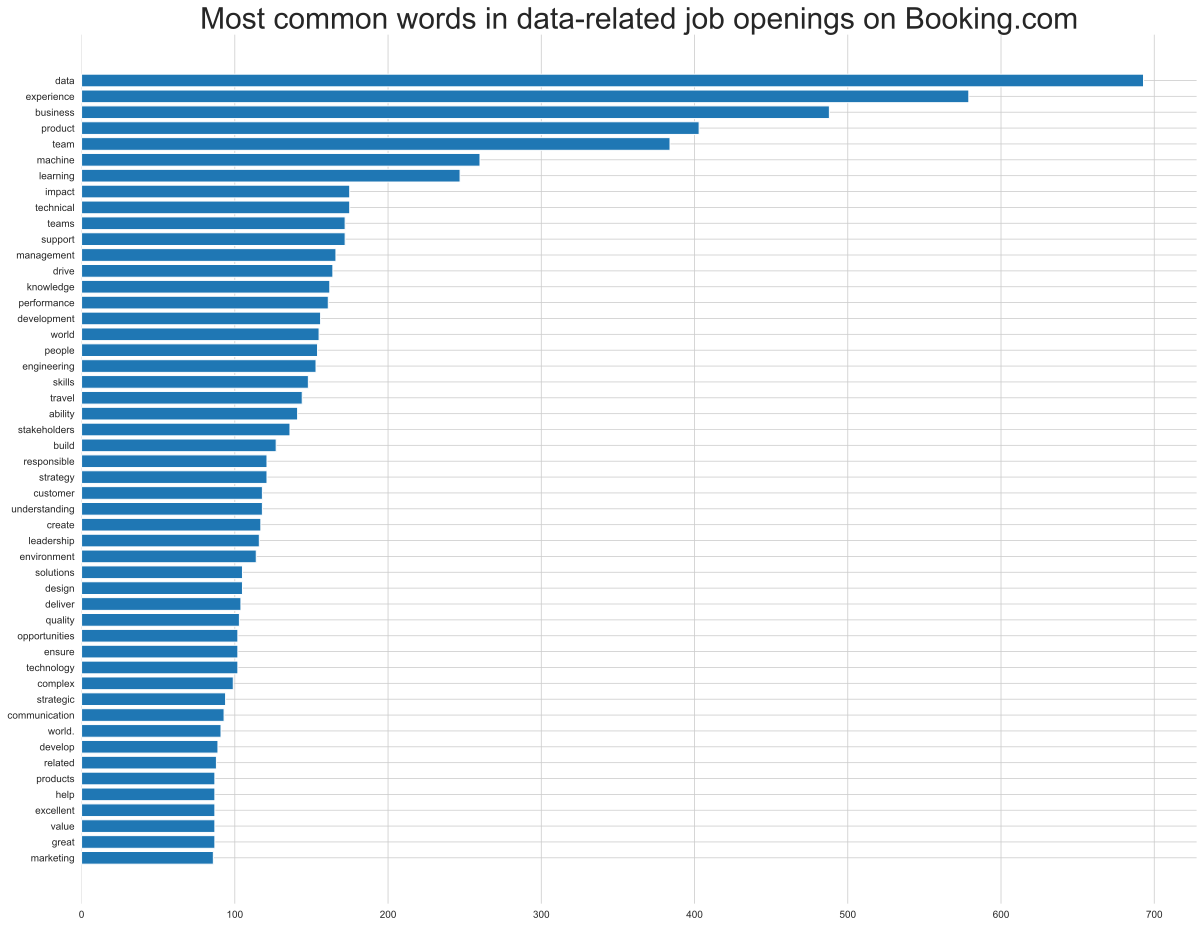

In [40]:
wordBarGraph(df,'Job Description','Most common words in data-related job openings on Booking.com') #Calling the Bar Graph function to plot

### What did we learn?

Having looked only at single words without context we can conclude a few things:
- Through Data and Experience reign supreme there is a massive
- Team and Teams are treated seperately, but should be together - resulting in it becoming the 3rd most common 'word'.

In [92]:
word_count_dict.get('team') + word_count_dict.get('teams')

556

In [111]:
word_count_dict.get('world') + word_count_dict.get('world.')

246

In [108]:
100/df['Job Title'].count()

0.9259259259259259

In [86]:
words_popular_dict = {k: v for k, v in sorted(word_count_dict.items(), key=lambda item: item[1], reverse=True)} #Returns dictionary of most popular words
words_popular_dict

{'and': 4824,
 'the': 2910,
 'to': 2726,
 'of': 2015,
 'a': 1366,
 'in': 1312,
 'with': 1028,
 'for': 953,
 'our': 702,
 'data': 693,
 'is': 631,
 'we': 597,
 'experience': 579,
 'you': 569,
 'on': 561,
 'that': 488,
 'business': 488,
 'or': 463,
 'as': 438,
 'will': 422,
 'product': 403,
 'are': 385,
 'team': 384,
 'an': 372,
 'booking.com': 360,
 'be': 354,
 'work': 349,
 'at': 343,
 'working': 312,
 'your': 312,
 'by': 286,
 'machine': 260,
 'strong': 255,
 'all': 249,
 'learning': 247,
 'their': 230,
 'from': 226,
 'new': 222,
 'through': 197,
 'within': 189,
 'opportunity': 189,
 'other': 185,
 'this': 176,
 'impact': 175,
 'technical': 175,
 'across': 174,
 'teams': 172,
 'support': 172,
 'have': 168,
 'management': 166,
 'drive': 164,
 'knowledge': 162,
 'performance': 161,
 '&': 159,
 'it': 156,
 'development': 156,
 'world': 155,
 'people': 154,
 'engineering': 153,
 'skills': 148,
 'travel': 144,
 'can': 141,
 'ability': 141,
 'make': 138,
 'into': 136,
 'stakeholders': 136,


In [89]:
words_nonstop = [w for w in y if w not in stopwords]
words_nonstop

['data',
 'experience',
 'business',
 'product',
 'team',
 'machine',
 'learning',
 'impact',
 'technical',
 'teams',
 'support',
 'management',
 'drive',
 'knowledge',
 'performance',
 'development',
 'world',
 'people',
 'engineering',
 'skills',
 'travel',
 'ability',
 'stakeholders',
 'build',
 'responsible',
 'strategy',
 'customer',
 'understanding',
 'create',
 'leadership',
 'environment',
 'solutions',
 'design',
 'deliver',
 'quality',
 'opportunities',
 'ensure',
 'technology',
 'complex',
 'strategic',
 'communication',
 'world.',
 'develop',
 'related',
 'products',
 'help',
 'excellent',
 'value',
 'great',
 'marketing',
 'identify',
 'manager',
 'lead',
 'reporting',
 'partners',
 'senior',
 'manage',
 'building',
 'action',
 'partner',
 'systems',
 'move',
 'improve',
 'platform',
 'use',
 'career',
 'driven',
 'projects',
 'competitive',
 'multiple',
 'community',
 'understand',
 'analysis',
 'customers',
 'needs',
 'commercial',
 'services',
 'ml',
 'analytics',
 'bey

In [90]:
words_popular_nonstop_dict = {k: y[k] for k in u if k in y}

In [91]:
words_popular_nonstop_dict

{'data': 693,
 'experience': 579,
 'business': 488,
 'product': 403,
 'team': 384,
 'machine': 260,
 'learning': 247,
 'impact': 175,
 'technical': 175,
 'teams': 172,
 'support': 172,
 'management': 166,
 'drive': 164,
 'knowledge': 162,
 'performance': 161,
 'development': 156,
 'world': 155,
 'people': 154,
 'engineering': 153,
 'skills': 148,
 'travel': 144,
 'ability': 141,
 'stakeholders': 136,
 'build': 127,
 'responsible': 121,
 'strategy': 121,
 'customer': 118,
 'understanding': 118,
 'create': 117,
 'leadership': 116,
 'environment': 114,
 'solutions': 105,
 'design': 105,
 'deliver': 104,
 'quality': 103,
 'opportunities': 102,
 'ensure': 102,
 'technology': 102,
 'complex': 99,
 'strategic': 94,
 'communication': 93,
 'world.': 91,
 'develop': 89,
 'related': 88,
 'products': 87,
 'help': 87,
 'excellent': 87,
 'value': 87,
 'great': 87,
 'marketing': 86,
 'identify': 84,
 'manager': 83,
 'lead': 82,
 'reporting': 81,
 'partners': 80,
 'senior': 80,
 'manage': 79,
 'buildi

In [22]:
#I'm trying to group together TEAM mand TEAMS to see what difference that makes
# Make WORDLCOUDS AND PLOTS for SPECIFIC DATA JOBS